In [1]:
import pandas as pd
import re
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.utils import np_utils
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import tree
from tensorflow.keras.preprocessing import sequence
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MekdimTamirat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:

HSD_data = pd.read_csv('C:/Users/MekdimTamirat/Documents/Active Projects/hateSpeechDetectionOnSocailMedia/data_HSD_final.csv')
HSD_data.columns = ['Text', 'Catagory'] # give column names


In [3]:
HSD_data.head()
HSD_data.tail()

,Text,Catagory
9394,ይህ ቆሻሻ መንግስት ህዝብ አስጨረሰ እባካችሁ ለዚህ የዋህ ሚስኪን ህዝብ/...,hate-speech
9395,ሀሀሀሀሀሀሀሀ አበረ አዳሙ የአንተን በደል ጊዜ ይመልሰው,hate-speech
9396,እስክንድር ጋ ተገናኝ የአአ መሪ እሱ ነው ታኬ ህገወጥ ነው!!,hate-speech
9397,ፎቶ ብቻ ጉራ ብቻ መጀመሪያ የ አ.አ ልጆችን ፍታ,hate-speech
9398,የኦርቶዶክስ እያፈረሱ የሌላን ይገነባሉ ድሮም ሴጣን ቤቱን ለማደስ ይሮጣል...,hate-speech


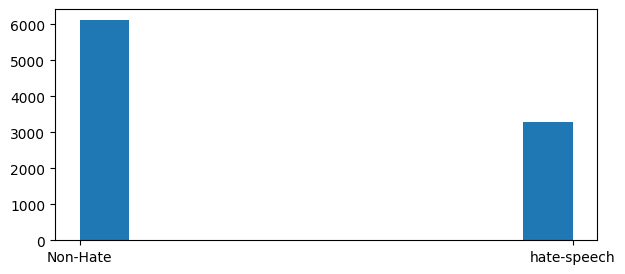

In [4]:
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 3))
ax.hist(HSD_data['Catagory'])
 
# Show plot
plt.show()


# pre-processing the data

####  step- 1 Removing unnecessary punctuation and characters
####  step -2 Tokenization
####  step -3 Removing stop words 
####  step-4  Normalization
#####  step -5 Stemming
#####  step -6 Lemmatization


### Step -1 

In [5]:
words = HSD_data['Text']
finalWords = []
for word in words:
    
    word = word.strip() # removing the uncessary word whitespaces
    
    #remove any non-alphanumeric character
    word = re.sub(r'\W', ' ', str(word))
    
    #remove any digit
    word = re.sub("(\\d)+"," ",word)
    
    #remove punctuation 
    word = re.sub(",#'!:;"," ",word)
    
    #remove any latin characters 
    word = re.sub(r'[a-zA-Z]+', '', word)

    word = re.sub('\s+', ' ', word)  # remove extra whitespace
    finalWords.append(word)



###  step -2 

In [6]:

tokenizedList = []
for lineWord in finalWords:
    separatedWords = lineWord.split(' ')
    word = [word for word in separatedWords if   word.strip() != '']
    tokenizedList.append(word)
    

### step -3

In [7]:
# list amharic stop words
stopwords=['ነው', 'እና', 'እኔ', 'የእኔ','እኔ','ራሴ','እኛ','የእኛ','እኛ','ራሳችን','አንቺ' ,'የእርስዎ' ,'እራስዎ','እራሳችሁን','የእሱ',
           'እሱ','እ','ራሱ','እሷ' 'ራሷን','እሱ','በራሱ','እነሱ','የእነሱ','እራሳቸው','ምንድን','የት','ማን','ይሄ','ያንን','እነዚህ','እነዚያ'
           ,'ነው','እነዚህ','ናቸው','ነበር','ነበሩ','መሆን','ሆኗል','መሆን','አለ','ነበሩ','አለው','መስራት','ያደርገዋል','አደረጉት',
           'ማድረግ','እና','ግን','ከሆነ','ወይም','ምክንያቱም','እንደ','እስከ','ገና','የ','ለ','ከ','ጋር','ስለ','መካከል','ውስጥ',
           'ከዚህ','በፊት','በኋላ','ከላይ','ከታች','ወደ','ከ','ወደ','ላይ','ታች','ውስጥ','ውጭ','በላይ','በታች','በድጋሚ','እናስ','እናም']

           
cleanedWordsList= []
for lineWords in tokenizedList:
    tempList = []
    for word in lineWords:
        if word.strip() not in stopwords:
            tempList.append(word)
    cleanedWordsList.append(tempList)
    
        

### Step -4 

In [8]:
# for the time being this is fine but convert it to something good but not this at all

normalizedSenteces = []
for linesWords in cleanedWordsList:
    tempList = []
    for word in linesWords:
        
        word = re.sub("ሐ","ሀ",word)
        word = re.sub("ሑ","ሁ",word)
        word = re.sub("ሒ","ሂ",word)
        word = re.sub("ሓ","ሃ",word)
        word = re.sub("ሔ","ሄ",word)
        word = re.sub("ሕ","ህ",word)
        word = re.sub("ሖ","ሆ",word)
        
        word = re.sub("ኀ","ሀ",word)
        word = re.sub("ኁ","ሁ",word)
        word = re.sub("ኂ","ሂ",word)
        word = re.sub("ኃ","ሃ",word)
        word = re.sub("ኄ","ሄ",word)
        word = re.sub("ኅ","ህ",word)
        word = re.sub("ኆ","ሆ",word)
        
        word = re.sub("ሠ","ሰ",word)
        word = re.sub("ሡ","ሱ",word)
        word = re.sub("ሢ","ሲ",word)
        word = re.sub("ሣ","ሳ",word)
        word = re.sub("ሤ","ሴ",word)
        word = re.sub("ሥ","ስ",word)
        word = re.sub("ሦ","ሶ",word)
        
        word = re.sub("ዐ","አ",word)
        word = re.sub("ዑ","ኡ",word)
        word = re.sub("ዒ","ኢ",word)
        word = re.sub("ዓ","ኣ",word)
        word = re.sub("ዔ","ኤ",word)
        word = re.sub("ዕ","እ",word)
        word = re.sub("ዖ","ኦ",word)
        
        word = re.sub("ዐ","አ",word)
        word = re.sub("ዑ","ኡ",word)
        word = re.sub("ዒ","ኢ",word)
        word = re.sub("ዓ","ኣ",word)
        word = re.sub("ዔ","ኤ",word)
        word = re.sub("ዕ","እ",word)
        word = re.sub("ዖ","ኦ",word)
        
        word = re.sub("ጸ","ፀ",word)
        word = re.sub("ጹ","ፁ",word)
        word = re.sub("ጺ","ፂ",word)
        word = re.sub("ጻ","ፃ",word)
        word = re.sub("ጼ","ፄ",word)
        word = re.sub("ጽ","ፅ",word)
        word = re.sub("ጾ","ፆ",word)
        
        tempList.append(word)
    normalizedSenteces.append(tempList)
               

In [9]:
HSD_data['Catagory'] = HSD_data.Catagory.map({'Non-Hate':1,'hate-speech':0})

# N-grams Vectorizer Models

In [10]:
# # Split into training and testing data
x = HSD_data['Text']
y = HSD_data['Catagory']


In [11]:
import pandas as pd


normalizedSenteces  = pd.Series(normalizedSenteces)

finalSentences = []
for lists in normalizedSenteces:
    temp = ""
    for word in lists:
        temp =  temp +" "+word
    finalSentences.append(temp)

    
x = pd.Series(finalSentences)

## Uni-Gram

In [12]:
ngram_vectorizer_uni = CountVectorizer(
    analyzer='word',
    ngram_range=(1, 1),
    binary=True, 
    
    decode_error = 'replace'
)
ngram_vectorizer_fit_uni = ngram_vectorizer_uni.fit_transform(x)



In [13]:
ngram_vectorizer_uni.get_feature_names_out()

array(['_ልም', '_ባደጋቸዉ', 'ሀሀ', ..., '፫፲', '፮፮፮', '፻፴፪'], dtype=object)

##### spliting  uni-Gram the data to training and test data


In [14]:
# Split into training and testing data after vectorizing for testing purpose
x_train_uni, x_test_uni, y_train_uni, y_test_uni = train_test_split(ngram_vectorizer_fit_uni,y,  test_size=0.2, random_state=42)


### Uni-gram with Naive Bayes

In [15]:
model_NB_uni = MultinomialNB()
model_NB_uni = model_NB_uni.fit(x_train_uni, y_train_uni)

#### predicting  and getting necessary scores and accuracy --NB


In [16]:
# prediction 
predicted_uni_nb = model_NB_uni.predict(x_test_uni)

# Score
nb_score_uni_nb = model_NB_uni.score(x_test_uni, y_test_uni)

accuracy_score_uni_nb = metrics.accuracy_score(y_test_uni, predicted_uni_nb)
confusion_matric_uni_nb = metrics.confusion_matrix(y_test_uni, predicted_uni_nb)
classification_score_uni_nb = metrics.classification_report(y_test_uni, predicted_uni_nb)
precission_score_uni_nb = metrics.precision_score(y_test_uni, predicted_uni_nb)
recall_score_uni_nb = metrics.recall_score(y_test_uni, predicted_uni_nb)


In [17]:
print(nb_score_uni_nb)
print(accuracy_score_uni_nb)
print(confusion_matric_uni_nb)
print(classification_score_uni_nb)
print(precission_score_uni_nb)
print(recall_score_uni_nb)

0.8686170212765958
0.8686170212765958
[[ 563  105]
 [ 142 1070]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       668
           1       0.91      0.88      0.90      1212

    accuracy                           0.87      1880
   macro avg       0.85      0.86      0.86      1880
weighted avg       0.87      0.87      0.87      1880

0.9106382978723404
0.8828382838283828


Text(50.722222222222214, 0.5, 'y_pred')

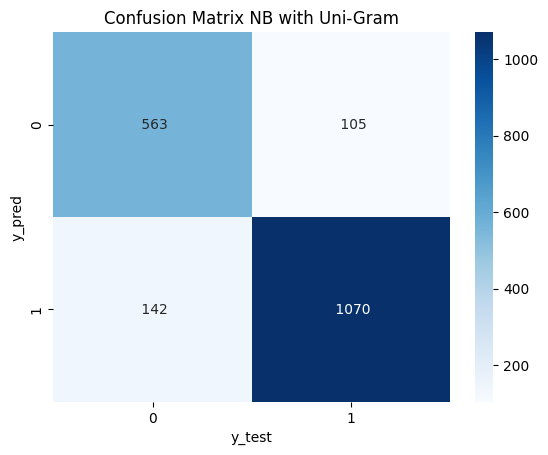

In [18]:
cm_rf=confusion_matrix(y_test_uni,predicted_uni_nb)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix NB with Uni-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### Uni-gram with Supported Vector Machine

In [19]:
# Perform classification with SVM, kernel=linear
SVM_uni= svm.SVC(
    kernel='linear',
    max_iter=-1
)
SVM_uni = SVM_uni.fit(x_train_uni, y_train_uni)


#### predicting the and getting necessary accurracy -- SVM

In [20]:
# prediction 
predicted_uni_svm = SVM_uni.predict(x_test_uni)

# Score
nb_score_uni_svm = SVM_uni.score(x_test_uni, y_test_uni)

accuracy_score_uni_svm  =metrics.accuracy_score(y_test_uni, predicted_uni_svm)
confusion_matric_uni_svm  = metrics.confusion_matrix(y_test_uni, predicted_uni_svm)
classification_score_uni_svm  = metrics.classification_report(y_test_uni, predicted_uni_svm)
precission_score_uni_svm  = metrics.precision_score(y_test_uni, predicted_uni_svm)
recall_score_uni_svm  = metrics.recall_score(y_test_uni, predicted_uni_svm)


In [21]:
print(nb_score_uni_svm)
print(accuracy_score_uni_svm)
print(confusion_matric_uni_svm)
print(classification_score_uni_svm)
print(precission_score_uni_svm)
print(recall_score_uni_svm)

0.8797872340425532
0.8797872340425532
[[ 500  168]
 [  58 1154]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       668
           1       0.87      0.95      0.91      1212

    accuracy                           0.88      1880
   macro avg       0.88      0.85      0.86      1880
weighted avg       0.88      0.88      0.88      1880

0.8729198184568835
0.9521452145214522


Text(50.722222222222214, 0.5, 'y_pred')

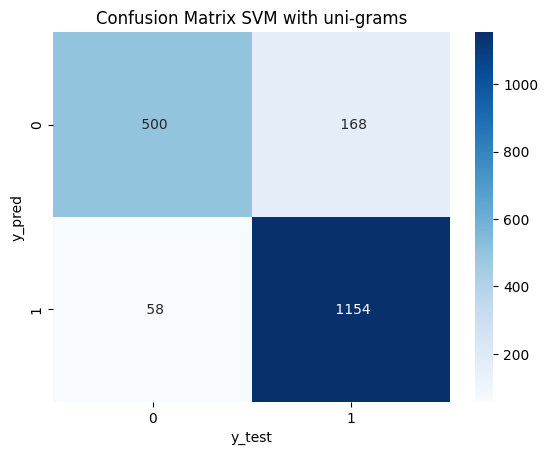

In [22]:
cm_rf=confusion_matrix(y_test_uni,predicted_uni_svm)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix SVM with uni-grams')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### Uni-gram with Random Forest

In [25]:
# creating a RF classifier
RandomForest_uni = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest_uni = RandomForest_uni.fit(x_train_uni, y_train_uni)


In [26]:
# prediction 
predicted_rf_uni = RandomForest_uni.predict(x_test_uni)

# Score
RF_score_rf_uni = RandomForest_uni.score(x_test_uni, y_test_uni)

accuracy_score_uni_rf = metrics.accuracy_score(y_test_uni, predicted_rf_uni)
confusion_matric_uni_rf = metrics.confusion_matrix(y_test_uni, predicted_rf_uni)
classification_score_uni_rf = metrics.classification_report(y_test_uni, predicted_rf_uni)
precission_score_uni_rf= metrics.precision_score(y_test_uni, predicted_rf_uni)
recall_score_uni_rf = metrics.recall_score(y_test_uni, predicted_rf_uni)

In [27]:
print(RF_score_rf_uni)
print(accuracy_score_uni_rf)
print(confusion_matric_uni_rf)
print(classification_score_uni_rf)
print(precission_score_uni_rf)
print(recall_score_uni_rf)

0.8632978723404255
0.8632978723404255
[[ 456  212]
 [  45 1167]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       668
           1       0.85      0.96      0.90      1212

    accuracy                           0.86      1880
   macro avg       0.88      0.82      0.84      1880
weighted avg       0.87      0.86      0.86      1880

0.8462654097171863
0.9628712871287128


Text(50.722222222222214, 0.5, 'y_pred')

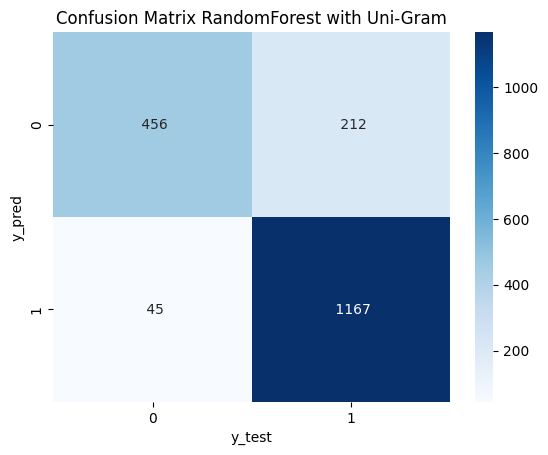

In [28]:
cm_rf=confusion_matrix(y_test_uni,predicted_rf_uni)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with Uni-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

## Bi-Gram

In [29]:
ngram_vectorizer_bi = CountVectorizer(
    analyzer='word',
    ngram_range=(2, 2),
)

ngram_vectorizer_fit_bi = ngram_vectorizer_bi.fit_transform(x)


In [30]:
ngram_vectorizer_bi.get_feature_names_out()

array(['_ልም _ባደጋቸዉ', 'ሀሀ ኣመት', 'ሀሀሀ ተንታና', ..., '፪፭ አመት', '፫፲ ኣመተ',
       '፮፮፮ በእዚህ'], dtype=object)

##### spliting  BI-Gram the data to training and test data


In [31]:
# Split into training and testing data after vectorizing for testing purpose
x_train_bi, x_test_bi, y_train_bi, y_test_bi = train_test_split(ngram_vectorizer_fit_bi,y,  test_size=0.2, random_state=42)

### BI-gram with Naive Bayes

In [32]:
model_NB_bi = MultinomialNB()
model_NB_bi.fit(x_train_bi, y_train_bi)

MultinomialNB()

##### predicting  and getting necessary scores and accuracy --NB

In [33]:
# prediction 
predicted_bi_nb = model_NB_bi.predict(x_test_bi)

# Score
nb_score_bi_nb = model_NB_bi.score(x_test_bi, y_test_bi)

accuracy_score_bi_nb =metrics.accuracy_score(y_test_bi, predicted_bi_nb)
confusion_matric_bi_nb = metrics.confusion_matrix(y_test_bi, predicted_bi_nb)
classification_score_bi_nb = metrics.classification_report(y_test_bi, predicted_bi_nb)
precission_score_bi_nb = metrics.precision_score(y_test_bi, predicted_bi_nb)
recall_score_bi_nb = metrics.recall_score(y_test_bi, predicted_bi_nb)


In [34]:
print(nb_score_bi_nb)
print(accuracy_score_bi_nb)
print(confusion_matric_bi_nb)
print(classification_score_bi_nb)
print(precission_score_bi_nb)
print(recall_score_bi_nb)

0.7430851063829788
0.7430851063829788
[[545 123]
 [360 852]]
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       668
           1       0.87      0.70      0.78      1212

    accuracy                           0.74      1880
   macro avg       0.74      0.76      0.74      1880
weighted avg       0.78      0.74      0.75      1880

0.8738461538461538
0.7029702970297029


Text(50.722222222222214, 0.5, 'y_pred')

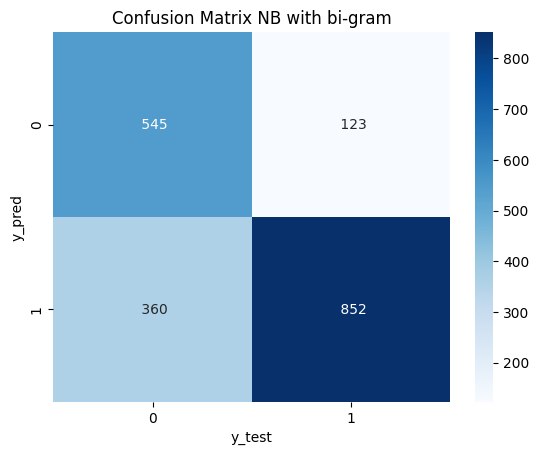

In [35]:
cm_rf=confusion_matrix(y_test_bi,predicted_bi_nb)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix NB with bi-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### BI-gram with Supported Vector Machine

In [36]:
# Perform classification with SVM, kernel=linear

SVM_bi= svm.SVC( 
    kernel='linear',
    max_iter=-1
)

SVM_bi = SVM_bi.fit(x_train_bi, y_train_bi)


##### predicting the and getting necessary accurracy -- SVM

In [37]:
# prediction 
predicted_bi_svm = SVM_bi.predict(x_test_bi)

# Score
nb_score_bi_svm = SVM_bi.score(x_test_bi, y_test_bi)

accuracy_score_bi_svm  =metrics.accuracy_score(y_test_bi, predicted_bi_svm)
confusion_matric_bi_svm  = metrics.confusion_matrix(y_test_bi, predicted_bi_svm)
classification_score_bi_svm  = metrics.classification_report(y_test_bi, predicted_bi_svm)
precission_score_bi_svm  = metrics.precision_score(y_test_bi, predicted_bi_svm)
recall_score_bi_svm  = metrics.recall_score(y_test_bi, predicted_bi_svm)


In [38]:
print(nb_score_bi_svm)
print(accuracy_score_bi_svm)
print(confusion_matric_bi_svm)
print(classification_score_bi_svm)
print(precission_score_bi_svm)
print(recall_score_bi_svm)

0.773936170212766
0.773936170212766
[[ 255  413]
 [  12 1200]]
              precision    recall  f1-score   support

           0       0.96      0.38      0.55       668
           1       0.74      0.99      0.85      1212

    accuracy                           0.77      1880
   macro avg       0.85      0.69      0.70      1880
weighted avg       0.82      0.77      0.74      1880

0.7439553626782393
0.9900990099009901


Text(50.722222222222214, 0.5, 'y_pred')

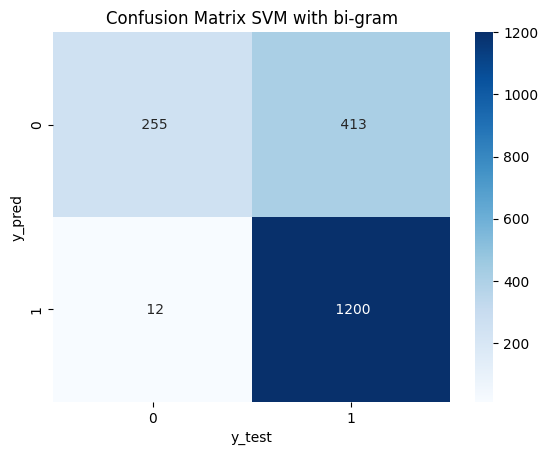

In [39]:
cm_rf=confusion_matrix(y_test_bi,predicted_bi_svm)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix SVM with bi-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### BI-gram with Random Forest

In [40]:
# creating a RF classifier
RandomForest_bi = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest_bi = RandomForest_bi.fit(x_train_bi, y_train_bi)

In [41]:
# prediction 
predicted_rf_bi = RandomForest_bi.predict(x_test_bi)

# Score
RF_score_rf_bi = RandomForest_bi.score(x_test_bi, y_test_bi)

accuracy_score_bi_rf = metrics.accuracy_score(y_test_bi, predicted_rf_bi)
confusion_matric_bi_rf = metrics.confusion_matrix(y_test_bi, predicted_rf_bi)
classification_score_bi_rf = metrics.classification_report(y_test_bi, predicted_rf_bi)
precission_score_bi_rf= metrics.precision_score(y_test_bi, predicted_rf_bi)
recall_score_bi_rf = metrics.recall_score(y_test_bi, predicted_rf_bi)

In [42]:
print(RF_score_rf_bi)
print(accuracy_score_bi_rf)
print(confusion_matric_bi_rf)
print(classification_score_bi_rf)
print(precission_score_bi_rf)
print(recall_score_bi_rf)

0.6824468085106383
0.6824468085106383
[[633  35]
 [562 650]]
              precision    recall  f1-score   support

           0       0.53      0.95      0.68       668
           1       0.95      0.54      0.69      1212

    accuracy                           0.68      1880
   macro avg       0.74      0.74      0.68      1880
weighted avg       0.80      0.68      0.68      1880

0.948905109489051
0.5363036303630363


Text(50.722222222222214, 0.5, 'y_pred')

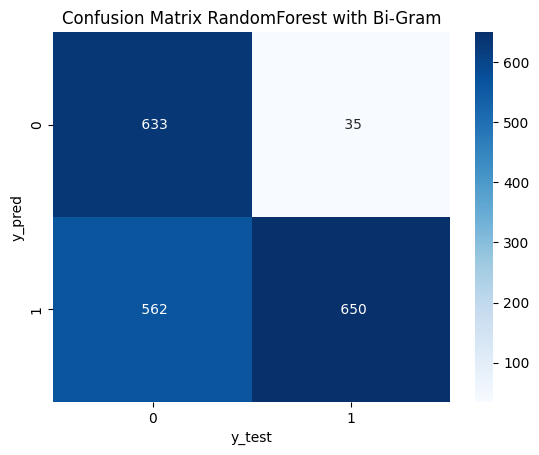

In [43]:
cm_rf=confusion_matrix(y_test_bi,predicted_rf_bi)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with Bi-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

## Tri-Gram 

In [44]:
ngram_vectorizer_tri = CountVectorizer(
    analyzer='word',
    ngram_range=(3, 3),
    binary=True, 
    decode_error = 'replace'
)
ngram_vectorizer_fit_tri = ngram_vectorizer_tri.fit_transform(x)


In [45]:
ngram_vectorizer_tri.get_feature_names_out()

array(['ሀሀ ኣመት ከሃያ', 'ሀሀሀ ተንታና መቅደላ', 'ሀሀሀ ጎንደር ሰውገድሎ', ...,
       '፪፭ አመት የመንግስት', '፫፲ ኣመተ ልደት', '፮፮፮ በእዚህ ሀገር'], dtype=object)

##### spliting  TRI-Gram the data to training and test data

In [46]:
# Split into training and testing data after vectorizing for testing purpose
x_train_tri, x_test_tri, y_train_tri, y_test_tri = train_test_split(ngram_vectorizer_fit_tri,y,  test_size=0.2, random_state=42)

### TRI-gram with Naive Bayes

In [47]:
model_NB_tri = MultinomialNB()
model_NB_tri = model_NB_tri.fit(x_train_tri, y_train_tri)

##### predicting  and getting necessary scores and accuracy --NB

In [48]:
# prediction 
predicted_tri_nb = model_NB_tri.predict(x_test_tri)

# Score
nb_score_tri_nb = model_NB_tri.score(x_test_tri, y_test_tri)

accuracy_score_tri_nb = metrics.accuracy_score(y_test_tri, predicted_tri_nb)
confusion_matric_tri_nb = metrics.confusion_matrix(y_test_tri, predicted_tri_nb)
classification_score_tri_nb = metrics.classification_report(y_test_tri, predicted_tri_nb)
precission_score_tri_nb = metrics.precision_score(y_test_tri, predicted_tri_nb)
recall_score_bi_trb = metrics.recall_score(y_test_tri, predicted_tri_nb)


In [49]:
print(nb_score_tri_nb)
print(accuracy_score_tri_nb)
print(confusion_matric_tri_nb)
print(classification_score_tri_nb)
print(precission_score_tri_nb)
print(recall_score_bi_trb)

0.7132978723404255
0.7132978723404255
[[442 226]
 [313 899]]
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       668
           1       0.80      0.74      0.77      1212

    accuracy                           0.71      1880
   macro avg       0.69      0.70      0.70      1880
weighted avg       0.72      0.71      0.72      1880

0.7991111111111111
0.7417491749174917


Text(50.722222222222214, 0.5, 'y_pred')

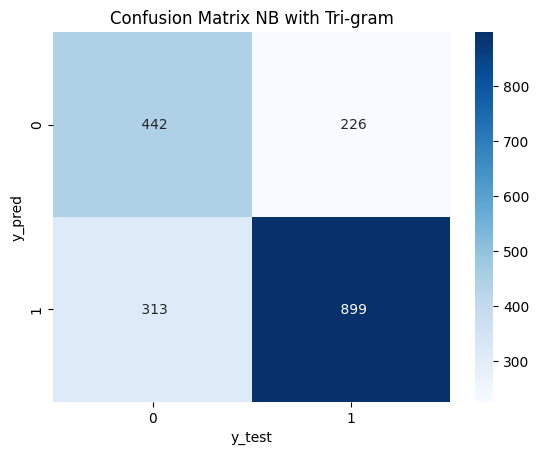

In [50]:
cm_rf=confusion_matrix(y_test_tri,predicted_tri_nb)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix NB with Tri-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### TRI-gram with Supported Vector Machine

In [51]:
# Perform classification with SVM, kernel=lineare

SVM_tri= svm.SVC( 
    kernel='linear',
    max_iter=-1
)

SVM_tri = SVM_tri.fit(x_train_tri, y_train_tri)


##### predicting the and getting necessary accurracy -- SVM

In [52]:
# prediction 
predicted_tri_svm = SVM_tri.predict(x_test_tri)

# Score
nb_score_tri_svm = SVM_tri.score(x_test_tri, y_test_tri)

accuracy_score_tri_svm  =metrics.accuracy_score(y_test_tri, predicted_tri_svm)
confusion_matric_tri_svm  = metrics.confusion_matrix(y_test_tri, predicted_tri_svm)
classification_score_tri_svm  = metrics.classification_report(y_test_tri, predicted_tri_svm)
precission_score_tri_svm  = metrics.precision_score(y_test_tri, predicted_tri_svm)
recall_score_tri_svm  = metrics.recall_score(y_test_tri, predicted_tri_svm)


In [53]:
print(nb_score_tri_svm)
print(accuracy_score_tri_svm)
print(confusion_matric_tri_svm)
print(classification_score_tri_svm)
print(precission_score_tri_svm)
print(recall_score_tri_svm)

0.7446808510638298
0.7446808510638298
[[ 190  478]
 [   2 1210]]
              precision    recall  f1-score   support

           0       0.99      0.28      0.44       668
           1       0.72      1.00      0.83      1212

    accuracy                           0.74      1880
   macro avg       0.85      0.64      0.64      1880
weighted avg       0.81      0.74      0.69      1880

0.716824644549763
0.9983498349834984


Text(50.722222222222214, 0.5, 'y_pred')

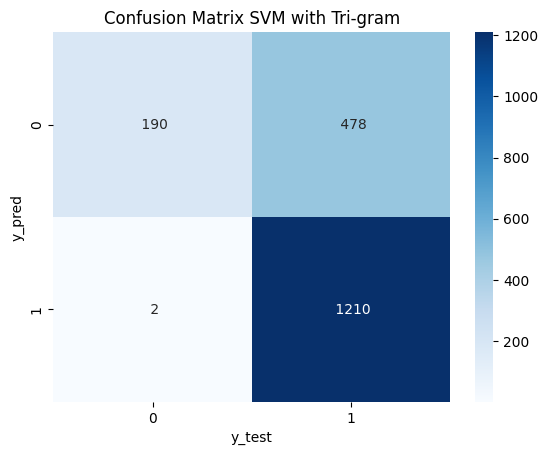

In [54]:
cm_rf=confusion_matrix(y_test_tri,predicted_tri_svm)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix SVM with Tri-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### TRI-gram with Random Forest

In [55]:
# creating a RF classifier
RandomForest_tri = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest_tri = RandomForest_tri.fit(x_train_tri, y_train_tri)

##### predicting the and getting necessary accurracy -- RF

In [56]:
# prediction 
predicted_rf_tri = RandomForest_tri.predict(x_test_tri)

# Score
RF_score_rf_tri = RandomForest_tri.score(x_test_tri, y_test_tri)

accuracy_score_tri_rf = metrics.accuracy_score(y_test_tri, predicted_rf_tri)
confusion_matric_tri_rf = metrics.confusion_matrix(y_test_tri, predicted_rf_tri)
classification_score_tri_rf = metrics.classification_report(y_test_tri, predicted_rf_tri)
precission_score_tri_rf= metrics.precision_score(y_test_tri, predicted_rf_tri)
recall_score_tri_rf = metrics.recall_score(y_test_tri, predicted_rf_tri)

In [57]:
print(RF_score_rf_tri)
print(accuracy_score_tri_rf)
print(confusion_matric_tri_rf)
print(classification_score_tri_rf)
print(precission_score_tri_rf)
print(recall_score_tri_rf)

0.7457446808510638
0.7457446808510638
[[ 194  474]
 [   4 1208]]
              precision    recall  f1-score   support

           0       0.98      0.29      0.45       668
           1       0.72      1.00      0.83      1212

    accuracy                           0.75      1880
   macro avg       0.85      0.64      0.64      1880
weighted avg       0.81      0.75      0.70      1880

0.718192627824019
0.9966996699669967


Text(50.722222222222214, 0.5, 'y_pred')

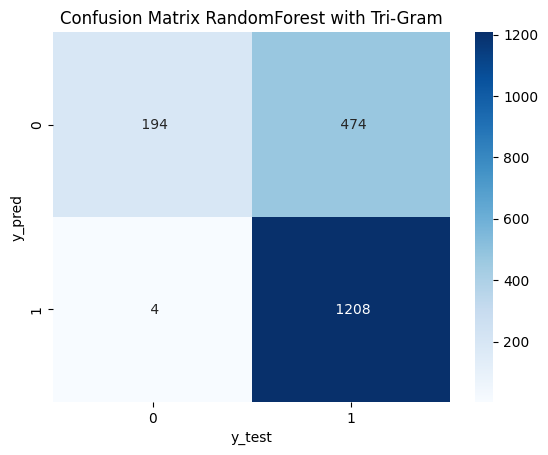

In [58]:
cm_rf=confusion_matrix(y_test_tri,predicted_rf_tri)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with Tri-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

## Uni-gram With Bi-gram

In [59]:
ngram_vectorizer_uni_bi = CountVectorizer(
    analyzer='word',
    ngram_range=(1, 2),
    binary=True, 
    decode_error = 'replace'
)

ngram_vectorizer_uni_bi_fit = ngram_vectorizer_uni_bi.fit_transform(x)


In [60]:
ngram_vectorizer_uni_bi.get_feature_names_out()

array(['_ልም', '_ልም _ባደጋቸዉ', '_ባደጋቸዉ', ..., '፮፮፮', '፮፮፮ በእዚህ', '፻፴፪'],
      dtype=object)

##### spliting  uni with bi-Gram the data to training and test data

In [61]:
# Split into training and testing data after vectorizing for testing purpose
x_train_uni_bi, x_test_uni_bi, y_train_uni_bi, y_test_uni_bi = train_test_split(ngram_vectorizer_uni_bi_fit, y ,  test_size=0.2, random_state=42)

### uni-gram + bi-gram with Naive Bayes

In [62]:
model_NB_uni_bi = MultinomialNB()
model_NB_uni_bi = model_NB_uni_bi.fit(x_train_uni_bi, y_train_uni_bi)

###### predicting  and getting necessary scores and accuracy --NB

In [63]:
# prediction 
predicted_uni_bi_nb = model_NB_uni_bi.predict(x_test_uni_bi)

# Score
nb_score_uni_bi_nb = model_NB_uni_bi.score(x_test_uni_bi, y_test_uni_bi)

accuracy_score_uni_bi_nb = metrics.accuracy_score(y_test_uni_bi, predicted_uni_bi_nb)
confusion_matric_uni_bi_nb = metrics.confusion_matrix(y_test_uni_bi, predicted_uni_bi_nb)
classification_score_uni_bi_nb = metrics.classification_report(y_test_uni_bi, predicted_uni_bi_nb)
precission_score_uni_bi_nb = metrics.precision_score(y_test_uni_bi, predicted_uni_bi_nb)
recall_score_uni_bi_nb = metrics.recall_score(y_test_uni_bi, predicted_uni_bi_nb)


In [64]:
print(nb_score_uni_bi_nb)
print(accuracy_score_uni_bi_nb)
print(confusion_matric_uni_bi_nb)
print(classification_score_uni_bi_nb)
print(precission_score_uni_bi_nb)
print(recall_score_uni_bi_nb)

0.8489361702127659
0.8489361702127659
[[597  71]
 [213 999]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       668
           1       0.93      0.82      0.88      1212

    accuracy                           0.85      1880
   macro avg       0.84      0.86      0.84      1880
weighted avg       0.86      0.85      0.85      1880

0.9336448598130841
0.8242574257425742


Text(50.722222222222214, 0.5, 'y_pred')

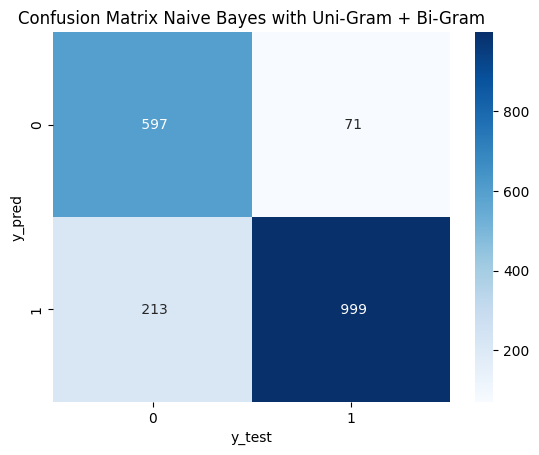

In [65]:
cm_rf=confusion_matrix(y_test_uni_bi,predicted_uni_bi_nb)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix Naive Bayes with Uni-Gram + Bi-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### uni-gram + bi-gram with Supported Vector Machine

In [66]:
# Perform classification with SVM, kernel=linear

SVM_uni_bi= svm.SVC( 
    kernel='linear',
    max_iter=-1
)

SVM_uni_bi = SVM_uni_bi.fit(x_train_uni_bi, y_train_uni_bi)


##### predicting the and getting necessary accurracy -- SVM

In [67]:
# prediction 
predicted_uni_bi_svm = SVM_uni_bi.predict(x_test_uni_bi)

# Score
nb_score_uni_bi_svm = SVM_uni_bi.score(x_test_uni_bi, y_test_uni_bi)

accuracy_score_uni_bi_svm  =metrics.accuracy_score(y_test_uni_bi, predicted_uni_bi_svm)
confusion_matric_uni_bi_svm  = metrics.confusion_matrix(y_test_uni_bi, predicted_uni_bi_svm)
classification_score_uni_bi_svm  = metrics.classification_report(y_test_uni_bi, predicted_uni_bi_svm)
precission_score_uni_bi_svm  = metrics.precision_score(y_test_uni_bi, predicted_uni_bi_svm)
recall_score_uni_bi_svm  = metrics.recall_score(y_test_uni_bi, predicted_uni_bi_svm)


In [68]:
print(nb_score_uni_bi_svm)
print(accuracy_score_uni_bi_svm)
print(confusion_matric_uni_bi_svm)
print(classification_score_uni_bi_svm)
print(precission_score_uni_bi_svm)
print(recall_score_uni_bi_svm)

0.8792553191489362
0.8792553191489362
[[ 483  185]
 [  42 1170]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       668
           1       0.86      0.97      0.91      1212

    accuracy                           0.88      1880
   macro avg       0.89      0.84      0.86      1880
weighted avg       0.88      0.88      0.88      1880

0.8634686346863468
0.9653465346534653


Text(50.722222222222214, 0.5, 'y_pred')

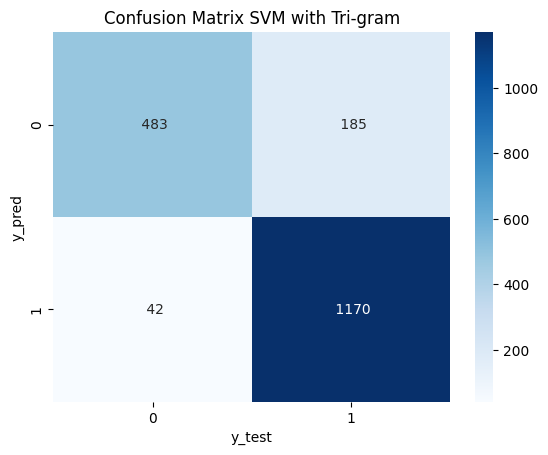

In [69]:
cm_rf=confusion_matrix(y_test_uni_bi,predicted_uni_bi_svm)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix SVM with Tri-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### uni-gram + bi-gram with Random Forest

In [70]:
# creating a RF classifier 
RandomForest_uni_bi = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest_uni_bi = RandomForest_uni_bi.fit(x_train_uni_bi, y_train_uni_bi)

##### predicting the and getting necessary accurracy -- RF

In [71]:
# prediction 
predicted_rf_uni_bi = RandomForest_uni_bi.predict(x_test_uni_bi)

# Score
RF_score_rf_uni_bi = RandomForest_uni_bi.score(x_test_uni_bi, y_test_uni_bi)

accuracy_score_uni_bi_rf = metrics.accuracy_score(y_test_uni_bi, predicted_rf_uni_bi)
confusion_matric_uni_bi_rf = metrics.confusion_matrix(y_test_uni_bi, predicted_rf_uni_bi)
classification_score_uni_bi_rf = metrics.classification_report(y_test_uni_bi, predicted_rf_uni_bi)
precission_score_uni_bi_rf= metrics.precision_score(y_test_uni_bi, predicted_rf_uni_bi)
recall_score_uni_bi_rf = metrics.recall_score(y_test_uni_bi, predicted_rf_uni_bi)

In [72]:
print(RF_score_rf_uni_bi)
print(accuracy_score_uni_bi_rf)
print(confusion_matric_uni_bi_rf)
print(classification_score_uni_bi_rf)
print(precission_score_uni_bi_rf)
print(recall_score_uni_bi_rf)

0.8574468085106383
0.8574468085106383
[[ 436  232]
 [  36 1176]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       668
           1       0.84      0.97      0.90      1212

    accuracy                           0.86      1880
   macro avg       0.88      0.81      0.83      1880
weighted avg       0.87      0.86      0.85      1880

0.8352272727272727
0.9702970297029703


Text(50.722222222222214, 0.5, 'y_pred')

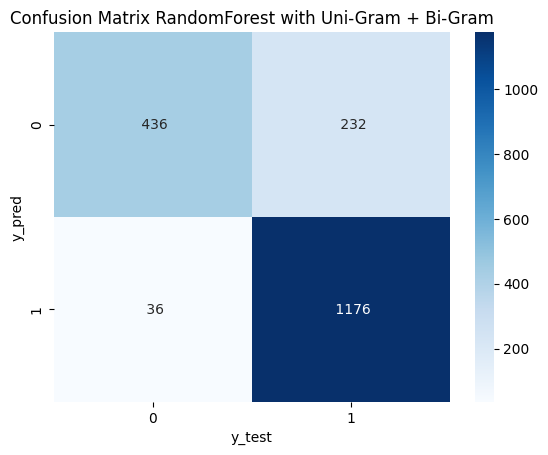

In [74]:
cm_rf=confusion_matrix(y_test_uni_bi,predicted_rf_uni_bi)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with Uni-Gram + Bi-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

## Uni-gram with Tri-gram

In [ ]:
# left blank for later after finishing re-implmenting CountVectorizer it self then it can be inser in here for its inteional --

## Bi-Gram with Tri gram

In [75]:
ngram_vectorizer_bi_tri = CountVectorizer(
    analyzer='word',
    ngram_range=(2, 3),
    binary=True, 
    decode_error = 'replace'
)
ngram_vectorizer_fit_bi_tri = ngram_vectorizer_bi_tri.fit_transform(x)


In [76]:
ngram_vectorizer_bi_tri.get_feature_names_out()

array(['_ልም _ባደጋቸዉ', 'ሀሀ ኣመት', 'ሀሀ ኣመት ከሃያ', ..., '፫፲ ኣመተ ልደት',
       '፮፮፮ በእዚህ', '፮፮፮ በእዚህ ሀገር'], dtype=object)

In [77]:
# Split into training and testing data after vectorizing for testing purpose
x_train_bi_tri, x_test_bi_tri, y_train_bi_tri, y_test_bi_tri = train_test_split(ngram_vectorizer_fit_bi_tri, y ,  test_size=0.2, random_state=42)

### bi-gram + tri-gram with Naive Bayes

In [78]:
model_NB_bi_tri = MultinomialNB()
model_NB_bi_tri = model_NB_bi_tri.fit(x_train_bi_tri, y_train_bi_tri)

###### predicting  and getting necessary scores and accuracy --NB

In [79]:
# prediction 
predicted_bi_tri_nb = model_NB_bi_tri.predict(x_test_bi_tri)

# Score
nb_score_bi_tri_nb = model_NB_bi_tri.score(x_test_bi_tri, y_test_bi_tri)

accuracy_score_bi_tri_nb= metrics.accuracy_score(y_test_bi_tri, predicted_bi_tri_nb)
confusion_matric_bi_tri_nb = metrics.confusion_matrix(y_test_bi_tri, predicted_bi_tri_nb)
classification_score_bi_tri_nb = metrics.classification_report(y_test_bi_tri, predicted_bi_tri_nb)
precission_score_bi_tri_nb = metrics.precision_score(y_test_bi_tri, predicted_bi_tri_nb)
recall_score_bi_tri_nb = metrics.recall_score(y_test_bi_tri, predicted_bi_tri_nb)


In [80]:
print(nb_score_bi_tri_nb)
print(accuracy_score_bi_tri_nb)
print(confusion_matric_bi_tri_nb)
print(classification_score_bi_tri_nb)
print(precission_score_bi_tri_nb)
print(recall_score_bi_tri_nb)

0.6914893617021277
0.6914893617021277
[[573  95]
 [485 727]]
              precision    recall  f1-score   support

           0       0.54      0.86      0.66       668
           1       0.88      0.60      0.71      1212

    accuracy                           0.69      1880
   macro avg       0.71      0.73      0.69      1880
weighted avg       0.76      0.69      0.70      1880

0.8844282238442822
0.5998349834983498


Text(50.722222222222214, 0.5, 'y_pred')

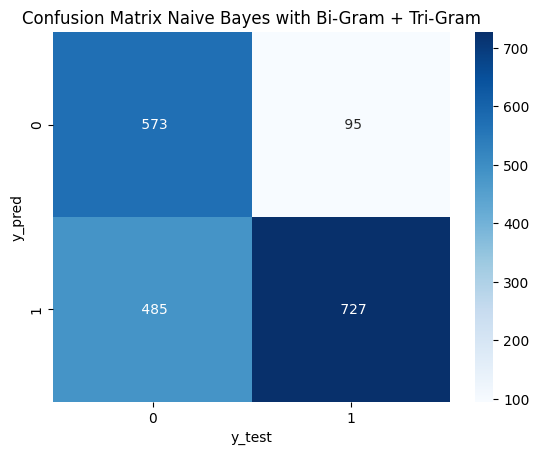

In [84]:
cm_rf=confusion_matrix(y_test_bi_tri,predicted_bi_tri_nb)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix Naive Bayes with Bi-Gram + Tri-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### bi-gram + tri-gram with Supported Vector Machine

In [85]:
# Perform classification with SVM, kernel=linear

SVM_bi_tri= svm.SVC( 
    kernel='linear',
    max_iter=-1
)

SVM_bi_tri = SVM_bi_tri.fit(x_train_bi_tri, y_train_bi_tri)


##### predicting the and getting necessary accurracy -- SVM

In [86]:
# prediction 
predicted_bi_tri_svm = SVM_bi_tri.predict(x_test_bi_tri)

# Score
nb_score_bi_tri_svm = SVM_bi_tri.score(x_test_bi_tri, y_test_bi_tri)

accuracy_score_bi_tri_svm  = metrics.accuracy_score(y_test_bi_tri, predicted_bi_tri_svm)
confusion_matric_bi_tri_svm   = metrics.confusion_matrix(y_test_bi_tri, predicted_bi_tri_svm)
classification_score_bi_tri_svm   = metrics.classification_report(y_test_bi_tri, predicted_bi_tri_svm)
precission_score_bi_tri_svm  = metrics.precision_score(y_test_bi_tri, predicted_bi_tri_svm)
recall_score_bi_tri_svm  = metrics.recall_score(y_test_bi_tri, predicted_bi_tri_svm)


In [87]:
print(nb_score_bi_tri_svm)
print(accuracy_score_bi_tri_svm)
print(confusion_matric_bi_tri_svm)
print(classification_score_bi_tri_svm)
print(precission_score_bi_tri_svm)
print(recall_score_bi_tri_svm)

0.7659574468085106
0.7659574468085106
[[ 236  432]
 [   8 1204]]
              precision    recall  f1-score   support

           0       0.97      0.35      0.52       668
           1       0.74      0.99      0.85      1212

    accuracy                           0.77      1880
   macro avg       0.85      0.67      0.68      1880
weighted avg       0.82      0.77      0.73      1880

0.7359413202933985
0.9933993399339934


Text(50.722222222222214, 0.5, 'y_pred')

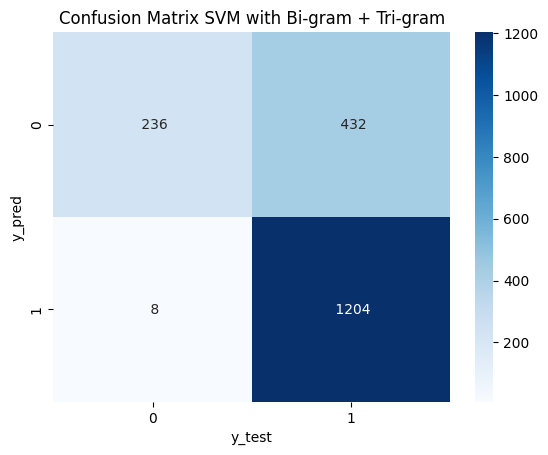

In [88]:
cm_rf=confusion_matrix(y_test_bi_tri,predicted_bi_tri_svm)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix SVM with Bi-gram + Tri-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### bi-gram + tri-gram with Random Forest 

In [89]:
# creating a RF classifier 
RandomForest_bi_tri = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest_bi_tri = RandomForest_bi_tri.fit(x_train_bi_tri, y_train_bi_tri)

##### predicting the and getting necessary accurracy -- RF

In [90]:
# prediction 
predicted_rf_bi_tri = RandomForest_bi_tri.predict(x_test_bi_tri)

# Score
RF_score_rf_bi_tri = RandomForest_bi_tri.score(x_test_bi_tri, y_test_bi_tri)

accuracy_score_bi_tri_rf = metrics.accuracy_score(y_test_bi_tri, predicted_rf_bi_tri)
confusion_matric_bi_tri_rf = metrics.confusion_matrix(y_test_bi_tri, predicted_rf_bi_tri)
classification_score_bi_tri_rf = metrics.classification_report(y_test_bi_tri, predicted_rf_bi_tri)
precission_score_bi_tri_rf= metrics.precision_score(y_test_bi_tri, predicted_rf_bi_tri)
recall_score_bi_tri_rf = metrics.recall_score(y_test_bi_tri, predicted_rf_bi_tri)

In [91]:
print(RF_score_rf_bi_tri)
print(accuracy_score_bi_tri_rf)
print(confusion_matric_bi_tri_rf)
print(classification_score_bi_tri_rf)
print(precission_score_bi_tri_rf)
print(recall_score_bi_tri_rf)

0.6808510638297872
0.6808510638297872
[[637  31]
 [569 643]]
              precision    recall  f1-score   support

           0       0.53      0.95      0.68       668
           1       0.95      0.53      0.68      1212

    accuracy                           0.68      1880
   macro avg       0.74      0.74      0.68      1880
weighted avg       0.80      0.68      0.68      1880

0.9540059347181009
0.5305280528052805


Text(50.722222222222214, 0.5, 'y_pred')

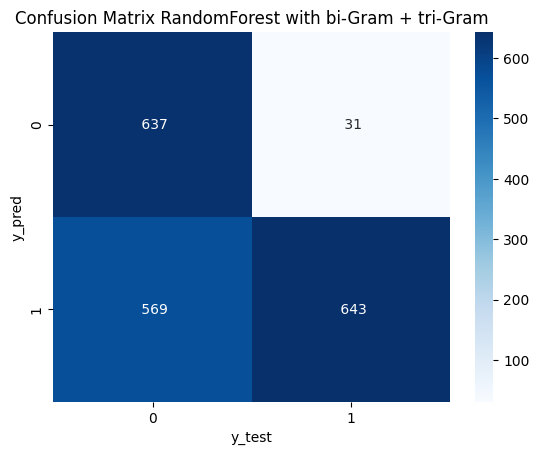

In [93]:
cm_rf=confusion_matrix(y_test_bi_tri,predicted_rf_bi_tri)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with bi-Gram + tri-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

## combination of Uni-gram , Bi-gram and Tri-gram

In [94]:
ngram_vectorizer_all = CountVectorizer(
    analyzer='word',
    ngram_range=(1, 3),
    binary=True, 
    decode_error = 'replace'
)
ngram_vectorizer_fit_all = ngram_vectorizer_all.fit_transform(x)


In [95]:
ngram_vectorizer_all.get_feature_names_out()

array(['_ልም', '_ልም _ባደጋቸዉ', '_ባደጋቸዉ', ..., '፮፮፮ በእዚህ', '፮፮፮ በእዚህ ሀገር',
       '፻፴፪'], dtype=object)

##### spliting  uni-Gram , bi-Gram , Tir-Gram the data to training and test data

In [97]:
# Split into training and testing data after vectorizing for testing purpose
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(ngram_vectorizer_fit_all, y ,  test_size=0.2, random_state=42)

### all-grams with Naive Bayes

In [98]:
model_NB_all = MultinomialNB()
model_NB_all= model_NB_all.fit(x_train_all, y_train_all)

###### predicting  and getting necessary scores and accuracy --NB

In [100]:
# prediction 
predicted_all_nb = model_NB_all.predict(x_test_all)

# Score
nb_score_all_nb = model_NB_all.score(x_test_all, y_test_all)

accuracy_score_all_nb = metrics.accuracy_score(y_test_all, predicted_all_nb)
confusion_matric_all_nb = metrics.confusion_matrix(y_test_all, predicted_all_nb)
classification_score_all_nb = metrics.classification_report(y_test_all, predicted_all_nb)
precission_score_uni_all_nb = metrics.precision_score(y_test_all, predicted_all_nb)
recall_score_all_nb = metrics.recall_score(y_test_all, predicted_all_nb)


In [101]:
print(nb_score_all_nb)
print(accuracy_score_all_nb)
print(confusion_matric_all_nb)
print(classification_score_all_nb)
print(precission_score_uni_all_nb)
print(recall_score_all_nb)

0.8271276595744681
0.8271276595744681
[[619  49]
 [276 936]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       668
           1       0.95      0.77      0.85      1212

    accuracy                           0.83      1880
   macro avg       0.82      0.85      0.82      1880
weighted avg       0.86      0.83      0.83      1880

0.950253807106599
0.7722772277227723


Text(50.722222222222214, 0.5, 'y_pred')

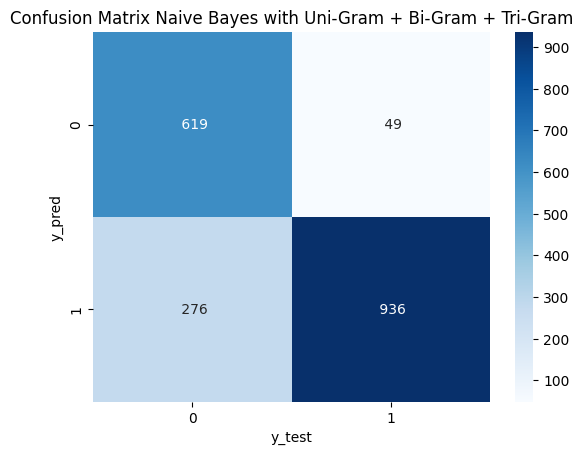

In [102]:
cm_rf=confusion_matrix(y_test_all,predicted_all_nb)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix Naive Bayes with Uni-Gram + Bi-Gram + Tri-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### All-gram with Supported Vector Machine

In [103]:
# Perform classification with SVM, kernel=linear

SVM_all_gram= svm.SVC( 
    kernel='linear',
    max_iter=-1
)

SVM_all_gram = SVM_all_gram.fit(x_train_all, y_train_all)


##### predicting the and getting necessary accurracy -- SVM

In [104]:
# prediction 
predicted_all_svm = SVM_all_gram.predict(x_test_all)

# Score
nb_score_all_svm = SVM_all_gram.score(x_test_all, y_test_all)

accuracy_score_all_svm = metrics.accuracy_score(y_test_all, predicted_all_svm)
confusion_matric_all_svm  = metrics.confusion_matrix(y_test_all, predicted_all_svm)
classification_score_all_svm   = metrics.classification_report(y_test_all, predicted_all_svm)
precission_score_all_svm = metrics.precision_score(y_test_all, predicted_all_svm)
recall_score_all_svm = metrics.recall_score(y_test_all, predicted_all_svm)


In [105]:
print(nb_score_all_svm)
print(accuracy_score_all_svm)
print(confusion_matric_all_svm)
print(classification_score_all_svm)
print(precission_score_all_svm)
print(recall_score_all_svm)

0.8739361702127659
0.8739361702127659
[[ 468  200]
 [  37 1175]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       668
           1       0.85      0.97      0.91      1212

    accuracy                           0.87      1880
   macro avg       0.89      0.84      0.85      1880
weighted avg       0.88      0.87      0.87      1880

0.8545454545454545
0.9694719471947195


Text(50.722222222222214, 0.5, 'y_pred')

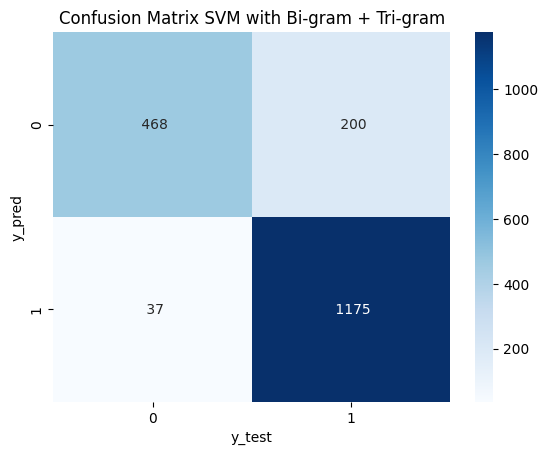

In [106]:
cm_rf=confusion_matrix(y_test_all,predicted_all_svm)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix SVM with Bi-gram + Tri-gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')

### all-gram with Random Forest 

In [107]:
# creating a RF classifier 
RandomForest_all = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest_all = RandomForest_all.fit(x_train_all, y_train_all)

##### predicting the and getting necessary accurracy -- RF

In [108]:
# prediction 
predicted_all_rf = RandomForest_all.predict(x_test_all)

# Score
RF_score_all_rf  = RandomForest_all.score(x_test_all, y_test_all)

accuracy_score_all_rf  = metrics.accuracy_score(y_test_all, predicted_all_rf)
confusion_matric_all_rf  = metrics.confusion_matrix(y_test_all, predicted_all_rf)
classification_score_all_rf  = metrics.classification_report(y_test_all, predicted_all_rf)
precission_score_all_rf = metrics.precision_score(y_test_all, predicted_all_rf)
recall_score_all_rf  = metrics.recall_score(y_test_all, predicted_all_rf)

In [109]:
print(RF_score_all_rf)
print(accuracy_score_all_rf)
print(confusion_matric_all_rf)
print(classification_score_all_rf)
print(precission_score_all_rf)
print(recall_score_all_rf)

0.8595744680851064
0.8595744680851064
[[ 437  231]
 [  33 1179]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       668
           1       0.84      0.97      0.90      1212

    accuracy                           0.86      1880
   macro avg       0.88      0.81      0.83      1880
weighted avg       0.87      0.86      0.85      1880

0.8361702127659575
0.9727722772277227


Text(50.722222222222214, 0.5, 'y_pred')

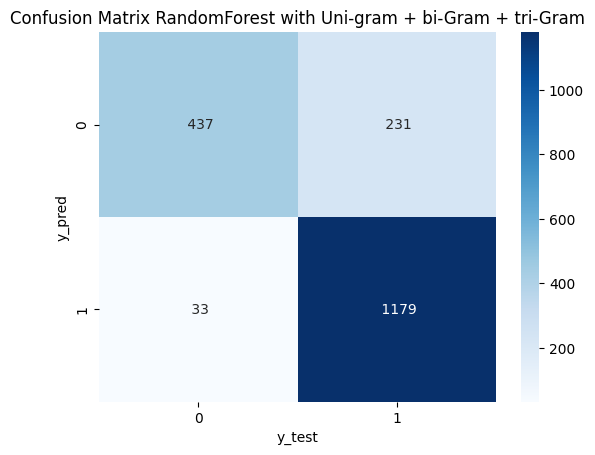

In [110]:
cm_rf=confusion_matrix(y_test_all,predicted_all_rf)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with Uni-gram + bi-Gram + tri-Gram')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')